In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census_df = pd.read_csv(file2)
combined_df = pd.read_csv(file3)

In [2]:
combined_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,signs_of_mental_illness,threat_level,flee,body_camera,GEO_ID,2015 Population,2016 Population,2017 Population,2018 Population,Average
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,...,False,other,Not fleeing,False,1600000US2079000,389955.0,389927.0,390599.0,389259.0,389935.00
1,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,...,True,attack,Not fleeing,False,1600000US0667000,864816.0,870887.0,884363.0,883305.0,875842.75
2,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,Arizona,...,False,attack,Car,False,1600000US0412000,260833.0,247459.0,253448.0,257153.0,254723.25
3,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,Male,White,Stockton,California,...,False,attack,Not fleeing,False,1600000US0675000,305650.0,307057.0,310476.0,311189.0,308593.00
4,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,Male,Black,Columbus,Ohio,...,True,other,Not fleeing,False,1600000US3918000,849067.0,862643.0,881901.0,895877.0,872372.00


In [6]:
# Lethal shootings per 100,000 people

# Identify the count of lethal shootings in each unique city and state
# combination through the use of groupby
#cities_state_grp = combined_df.groupby(['city', 'state'])
cities_state_grp = combined_df.groupby(['state', 'city'])
counts = cities_state_grp['id'].count()

# Convert to DF
counts_by_city_df = pd.DataFrame({'shooting occurences' : counts})

# Reset index
counts_by_city_df = counts_by_city_df.reset_index()

# Merge DF with average population information
per_capita_df = pd.merge(counts_by_city_df, 
                         combined_df[['city', 'state', 'Average']], 
                         on=('city', 'state'), 
                         how='left')

# Calculate per capita shootings
per_capita_df['shootings per 100,000'] = (per_capita_df['shooting occurences']/
                                     per_capita_df['Average'])*100000

# Restructuring of columns
per_capita_df = per_capita_df[['state', 'city', 'shooting occurences', 'Average', 'shootings per 100,000']]

# Column title format
per_capita_df = per_capita_df.rename(columns={'Average': 'average population'})

# Drop duplicates
per_capita_df = per_capita_df.drop_duplicates()

per_capita_df

,state,city,shooting occurences,average population,"shootings per 100,000"
0,Alabama,Birmingham,8,212595.75,3.763010
8,Alabama,Hoover,2,84958.50,2.354091
10,Alabama,Huntsville,8,195129.00,4.099852
18,Alabama,Mobile,3,191760.75,1.564449
21,Alabama,Montgomery,4,199588.25,2.004126
...,...,...,...,...,...
2436,Wisconsin,Madison,3,253696.50,1.182515
2439,Wisconsin,Milwaukee,14,595647.75,2.350382
2453,Wisconsin,Oshkosh,1,66633.00,1.500758
2454,Wisconsin,Racine,2,77574.50,2.578167


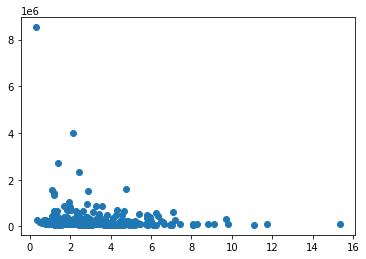

In [11]:
# Plot - Lethal shootings per 100,000 people
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])

plt.title=('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

In [ ]:
#fig.ylim=(0,2000000)